In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [24]:
df = pd.read_csv(r"job_data_cleaned.csv")
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company_txt,State,same_state,age,python_job,spark_job,aws_job,excel_job,R_job
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,1,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,1,0


In [25]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job'],
      dtype='object')

In [26]:
def title_cleaned(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else: 
        return 'na'
    
def seniority(title):
        if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
        elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
            return 'jr'
        else:
            return 'na'
    

In [27]:
df['job_par'] = df['Job Title'].apply(title_cleaned)

In [28]:
df['job_par'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_par, dtype: int64

In [29]:
df['job_rank'] = df['Job Title'].apply(seniority)
df.job_rank.value_counts()

na        519
senior    220
jr          3
Name: job_rank, dtype: int64

In [30]:
df['State'] = df['State'].apply(lambda x: 'CA' if 'los angeles' in x.strip().lower() else x.strip())
df.State.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
MO      9
AZ      9
AL      8
MI      6
DE      6
KY      6
GA      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
MN      2
ID      2
RI      1
SC      1
Name: State, dtype: int64

In [31]:
#job secription length
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [32]:
#competitors
df['Competitors_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [34]:
df.Competitors_count.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: Competitors_count, dtype: int64

In [36]:
import dill
dill.dump_session('eda.db')



In [1]:
import dill
dill.load_session('eda.db')

In [4]:
#hourly wage to normal
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hour == 1 else x.min_salary, axis =1)

In [7]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hour == 1 else x.max_salary, axis =1)

In [8]:
df[df.hour == 1][['hour','min_salary','max_salary']]

,hour,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [6]:
df['min_salary']

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [9]:
df.Company_txt = df.Company_txt.apply(lambda x: x.replace('\n',''))

In [11]:
df.Company_txt = df.Company_txt.apply(lambda x: x.replace('\r',''))

In [12]:
df.Company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_txt, Length: 742, dtype: object

In [14]:
df.describe()

,Rating,Founded,hour,EMP prov salary,min_salary,max_salary,avg_salary,same_state,age,python_job,spark_job,aws_job,excel_job,R_job,job_desc_len,Competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.225067,0.241240,0.522911,0.001348,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.417908,0.428124,0.499812,0.036711,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


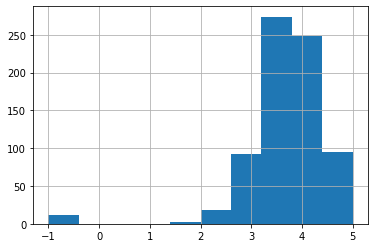

In [15]:
df.Rating.hist()

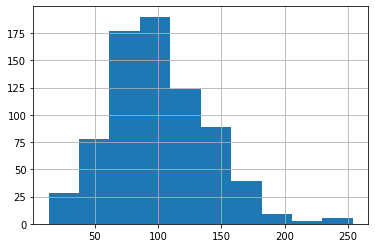

In [16]:
df.avg_salary.hist()

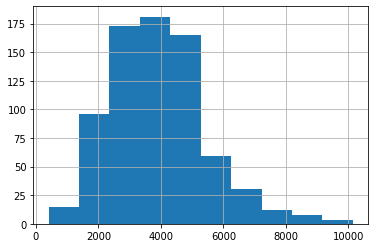

In [18]:
df.job_desc_len.hist()

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank', 'job_desc_len',
       'Competitors_count'],
      dtype='object')

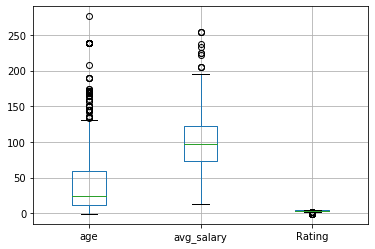

In [24]:
df.boxplot(column = ['age','avg_salary','Rating'])

In [25]:
df[['age','avg_salary','Rating','job_desc_len']].corr()

,age,avg_salary,Rating,job_desc_len
age,1.000000,0.019655,0.021655,0.165090
avg_salary,0.019655,1.000000,0.013492,0.078093
Rating,0.021655,0.013492,1.000000,-0.012631
job_desc_len,0.165090,0.078093,-0.012631,1.000000


In [26]:
dill.dump_session('eda1.db')

In [2]:
import dill
dill.load_session('eda1.db')

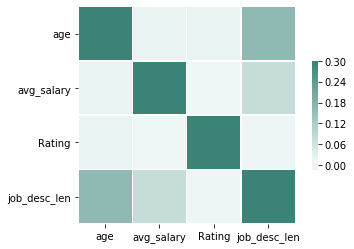

In [33]:
cmap = sn.diverging_palette(220,175, as_cmap = True)
sn.heatmap(df[['age','avg_salary','Rating','job_desc_len']].corr(),vmax=.3, center= 0, cmap= cmap,square = True, linewidth= .5, cbar_kws={"shrink": .5})

In [34]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank', 'job_desc_len',
       'Competitors_count'],
      dtype='object')

In [35]:
df_catg = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Company_txt','State', 'same_state','python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank']]

graph for Location total = 200


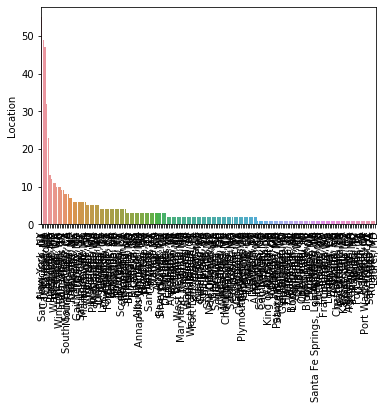

graph for Headquarters total = 198


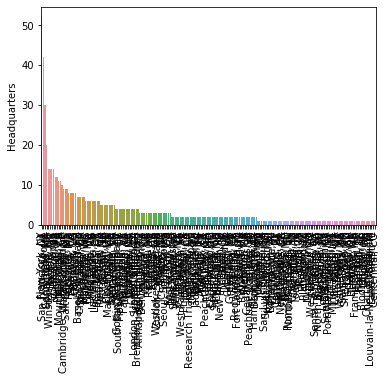

graph for Size total = 9


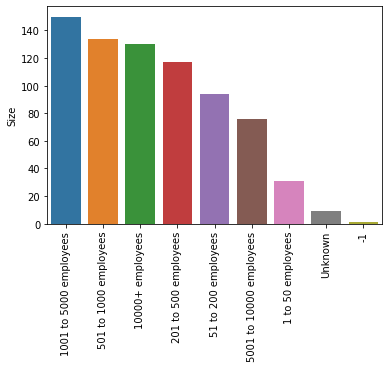

graph for Type of ownership total = 11


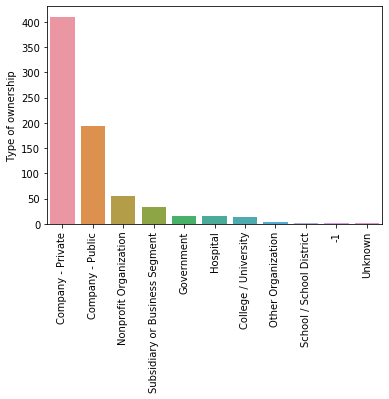

graph for Industry total = 60


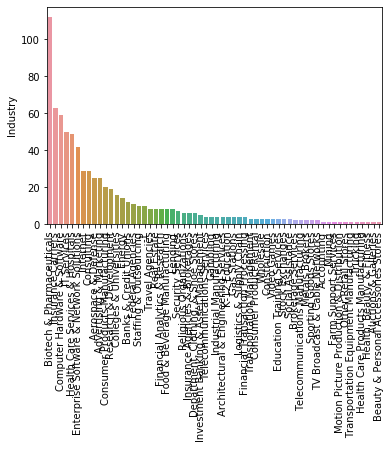

graph for Sector total = 25


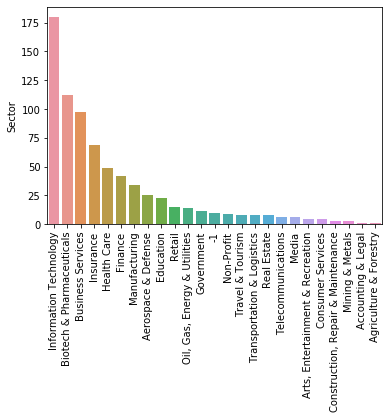

graph for Revenue total = 14


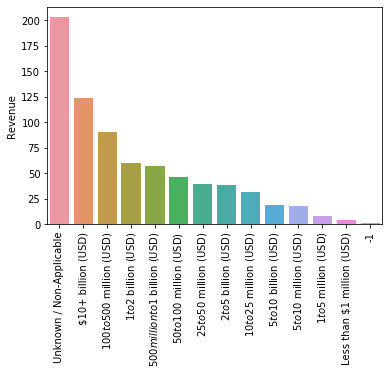

graph for Company_txt total = 343


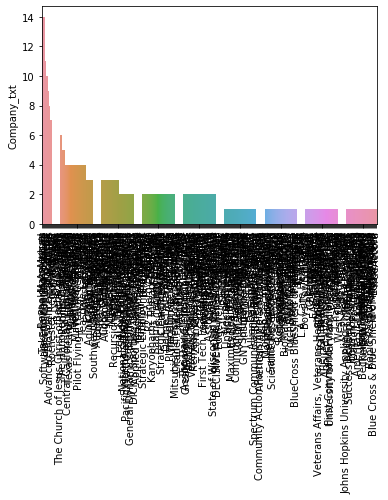

graph for State total = 37


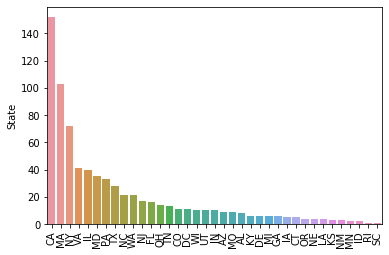

graph for same_state total = 2


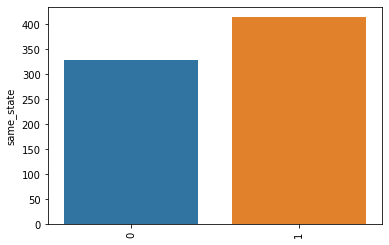

graph for python_job total = 2


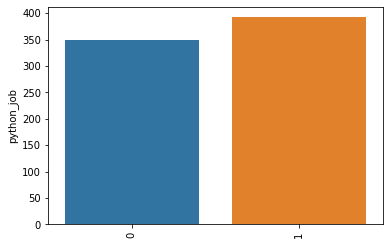

graph for spark_job total = 2


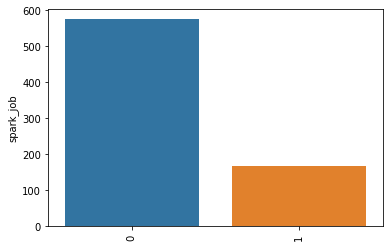

graph for aws_job total = 2


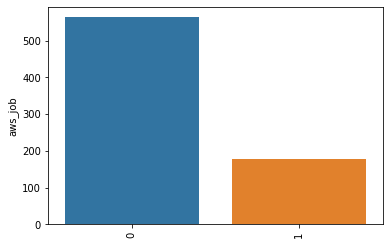

graph for excel_job total = 2


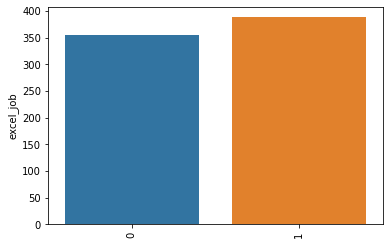

graph for R_job total = 2


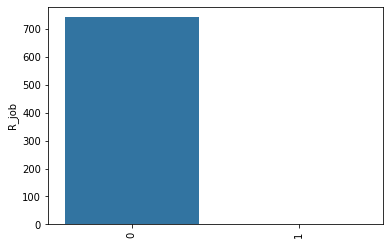

graph for job_par total = 7


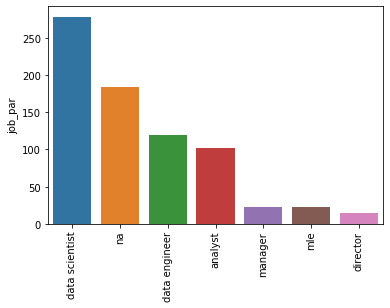

graph for job_rank total = 3


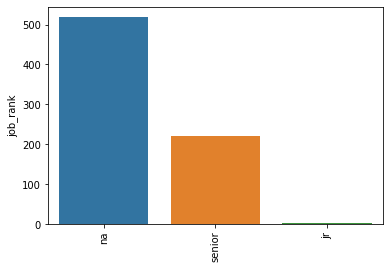

In [39]:
for i in df_catg.columns :
    catg_n = df_catg[i].value_counts()
    print("graph for" +' '+ i +' '+"total = " + str(len(catg_n)))
    chart = sn.barplot(x = catg_n.index, y = catg_n)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

graph for Location total = 20


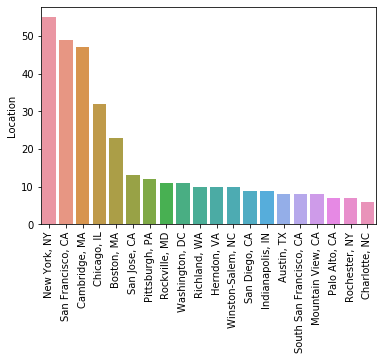

graph for Headquarters total = 20


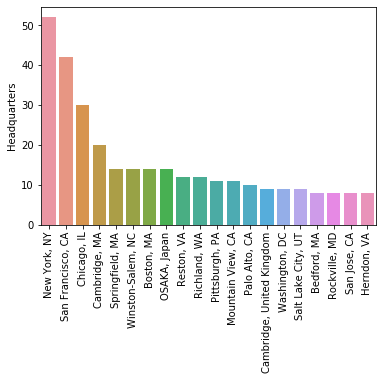

graph for Company_txt total = 20


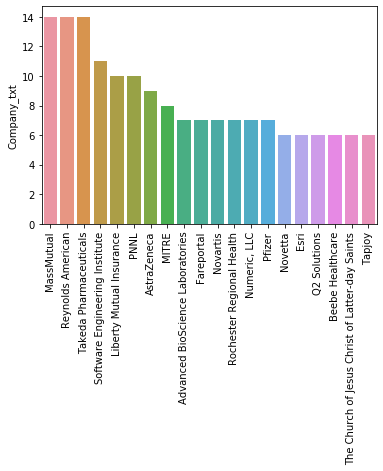

graph for Industry total = 20


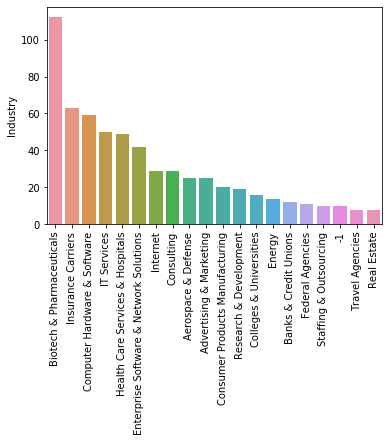

In [41]:

for i in df_catg[['Location','Headquarters','Company_txt','Industry']].columns :
    catg_n = df_catg[i].value_counts()[:20]
    print("graph for" +' '+ i +' '+"total = " + str(len(catg_n)))
    chart = sn.barplot(x = catg_n.index, y = catg_n)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [42]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank', 'job_desc_len',
       'Competitors_count'],
      dtype='object')

In [44]:
pd.pivot_table(df, index = 'job_par', values = 'avg_salary')

,avg_salary
job_par,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [45]:
pd.pivot_table(df, index = ['job_par','job_rank'], values = 'avg_salary')

avg_salary
job_par        job_rank            
analyst        jr         53.250000
               na         61.308219
               senior     79.092593
data engineer  na         96.701220
               senior    124.689189
data scientist jr        106.500000
               na        107.043011
               senior    138.956522
director       na        168.607143
manager        na         84.022727
mle            na        119.133333
               senior    142.071429
na             na         73.988189
               senior    109.061404

In [48]:
pd.pivot_table(df, index = 'State', values = 'avg_salary').sort_values('avg_salary',ascending = False)

,avg_salary
State,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [49]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'EMP prov salary', 'min_salary', 'max_salary', 'avg_salary',
       'Company_txt', 'State', 'same_state', 'age', 'python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job', 'job_par', 'job_rank', 'job_desc_len',
       'Competitors_count'],
      dtype='object')

In [52]:
df_pivot = df[['Rating', 'Industry','Sector','Revenue','Competitors_count','hour','EMP prov salary','python_job', 'spark_job',
       'aws_job', 'excel_job', 'R_job','Type of ownership','avg_salary']]

In [53]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index =i, values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional